In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

###         - CRIM     per capita crime rate by town
###         - NOX      nitric oxides concentration (parts per 10 million)
###         - RM       average number of rooms per dwelling
###         - PTRATIO  pupil-teacher ratio by town
###         - LSTAT    % lower status of the population
###         - MEDV     Median value of owner-occupied homes in $1000's


In [2]:
df = pd.read_csv("housing.csv")
df

,crim,nox,rm,ptratio,lstat,medv
0,0.00632,0.538,6.575,15.3,4.98,24.0
1,0.02731,0.469,6.421,17.8,9.14,21.6
2,0.02729,0.469,7.185,17.8,4.03,34.7
3,0.03237,0.458,6.998,18.7,2.94,33.4
4,0.06905,0.458,7.147,18.7,5.33,36.2
...,...,...,...,...,...,...
501,0.06263,0.573,6.593,21.0,9.67,22.4
502,0.04527,0.573,6.120,21.0,9.08,20.6
503,0.06076,0.573,6.976,21.0,5.64,23.9
504,0.10959,0.573,6.794,21.0,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   nox      506 non-null    float64
 2   rm       506 non-null    float64
 3   ptratio  506 non-null    float64
 4   lstat    506 non-null    float64
 5   medv     506 non-null    float64
dtypes: float64(6)
memory usage: 23.8 KB


In [4]:
df.describe()

,crim,nox,rm,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.554695,6.284634,18.455534,12.653063,22.532806
std,8.601545,0.115878,0.702617,2.164946,7.141062,9.197104
min,0.006320,0.385000,3.561000,12.600000,1.730000,5.000000
25%,0.082045,0.449000,5.885500,17.400000,6.950000,17.025000
50%,0.256510,0.538000,6.208500,19.050000,11.360000,21.200000
75%,3.677083,0.624000,6.623500,20.200000,16.955000,25.000000
max,88.976200,0.871000,8.780000,22.000000,37.970000,50.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

crim       0
nox        0
rm         0
ptratio    0
lstat      0
medv       0
dtype: int64

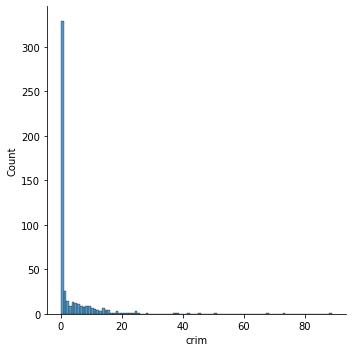

In [7]:
sns.displot(data = df , x ="crim")

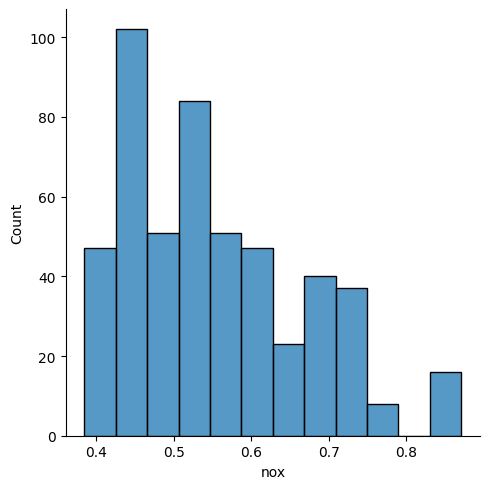

In [8]:
sns.displot(data = df , x ="nox")

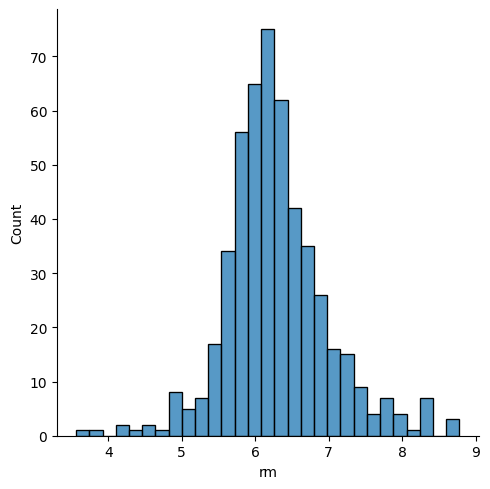

In [9]:
sns.displot(data = df , x ="rm")

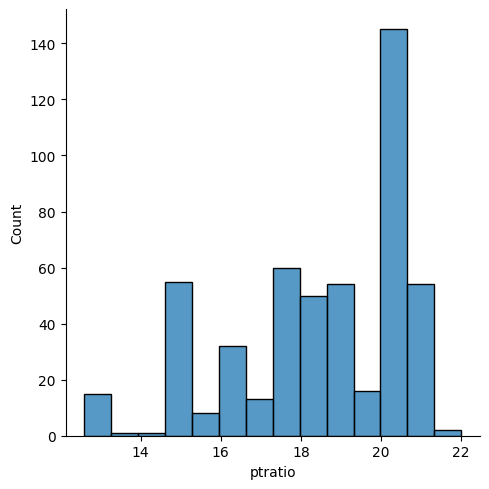

In [10]:
sns.displot(data = df , x ="ptratio")

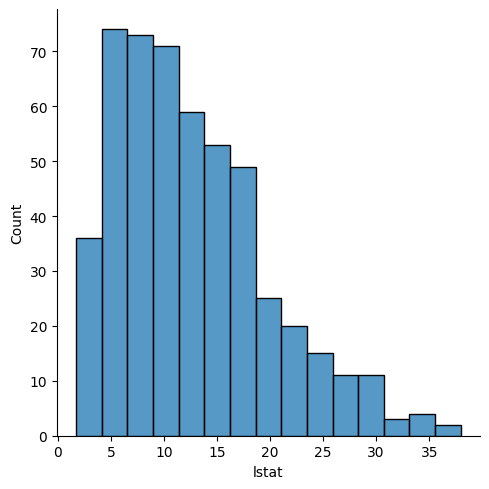

In [11]:
sns.displot(data = df , x ="lstat")

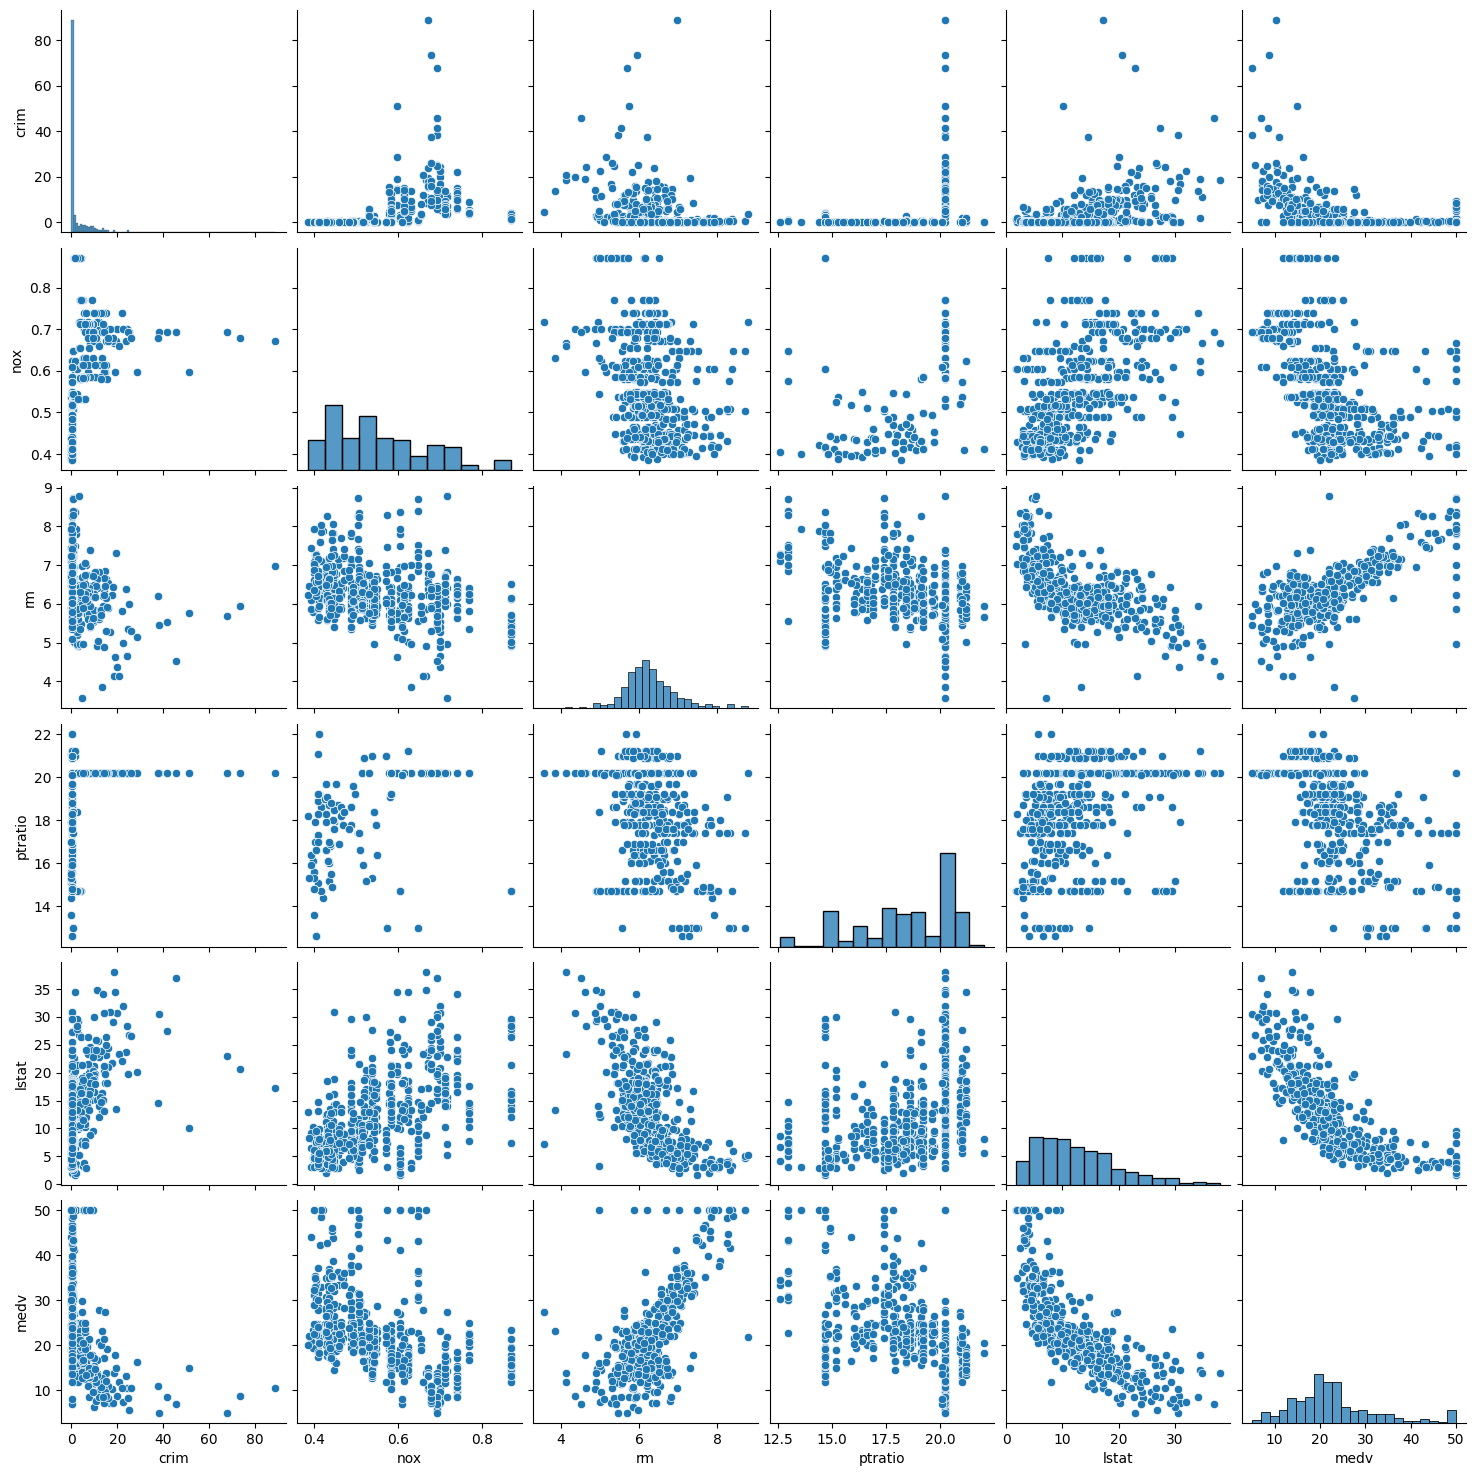

In [12]:
sns.pairplot(data = df )

<AxesSubplot:>

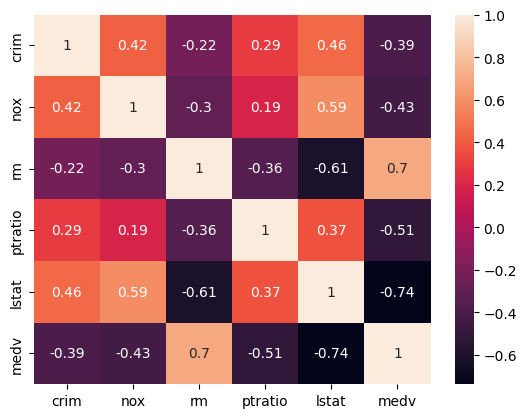

In [13]:
sns.heatmap(df.corr() , annot=True)

In [14]:
x = df.drop("medv" , axis = 1 )
y = df["medv"]

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.15 , random_state=7)

In [18]:
scaler =StandardScaler()

In [19]:
x_train.columns

Index(['crim', 'nox', 'rm', 'ptratio', 'lstat'], dtype='object')

In [20]:
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(x_train , y_train)

LinearRegression()

In [24]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
print("Train R squared is " , r2_score(y_train , y_train_pred))
print("Test R squared is " , r2_score(y_test , y_test_pred))

Train R squared is  0.682408684270221
Test R squared is  0.6567610905631198


#### Now we will try Polynomial Regression

In [88]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.15 , random_state=7)

In [90]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
poly = PolynomialFeatures(degree=2)

In [92]:
x_train.columns

Index(['crim', 'nox', 'rm', 'ptratio', 'lstat'], dtype='object')

In [85]:
poly_columns = ['crim' , 'crim_sq','nox', 'nox_sq','rm','rm_sq', 'ptratio',  'ptratio_sq', 'lstat' , 'lstat_sq'] 

In [94]:
poly_features = poly.fit_transform(x_train[x_train.columns])


In [98]:
model.fit(poly_features , y_train)

LinearRegression()

In [99]:
y_train_pred = model.predict(poly_features)
y_test_pred = model.predict(poly.fit_transform(x_test))

In [100]:
print("Train R squared is " , r2_score(y_train , y_train_pred))
print("Test R squared is " , r2_score(y_test , y_test_pred))

Train R squared is  0.8416629383173186
Test R squared is  0.721519422381163
